# Ejemplo práctico de una red neuronal construida a mano
---

Autor: Manuel Díaz Bendito

# 0 - Instalaciones necesarias e importación de librerías utilizadas

## Instalación de librerías

In [1]:
%pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\balle\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl (332.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\balle\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
%pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\balle\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Importación de librerías

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage import measure
import math

# 1 - Definición de funciones

In [5]:
### Sigmoid
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s=1/(1+np.exp(-z))
    
    return s

In [6]:
"""### Initialize weights"""

def initialize_weights(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    w=np.zeros([dim,1])
    b=0
  
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [37]:
"""### Forward and backward propagation"""

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained in the assignment

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px)
    Y -- true "label" vector of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = X.shape[0]
    
    # FORWARD PROPAGATION (FROM X TO COST)
   
    Y_hat=sigmoid(np.dot(w.T,X.T)+b)
    
    # Fix for NaN issue: clip predictions to avoid log(0)
    epsilon = 1e-15
    Y_hat = np.clip(Y_hat, epsilon, 1 - epsilon)
    
    cost=np.sum(np.dot(np.log(Y_hat),Y.T)+np.dot(np.log(1-Y_hat),(1-Y.T)))
    cost=-(1/m)*cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
   
    dw=np.dot(X.T,(Y_hat-Y).T)/m
    db=np.sum((Y_hat-Y))/m

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost
    

In [8]:
"""### Gradient descent"""

def gradient_descent(w, b, X, Y, num_iterations, learning_rate):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px, number of examples)
    Y -- true "label" vector of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
      
        grads, cost = propagate(w, b, X, Y)
      
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        
        w=w-(learning_rate*dw)
        b=b-(learning_rate*db)

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            # Print the cost every 100 training examples
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [9]:
"""### Make predictions"""

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[0]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[1], 1)
    
    # Compute vector "A" predicting the probabilities of the picture containing a 1
    
    A = sigmoid(np.dot(w.T, X.T) + b)
    
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0][i]>=0.5:
          Y_prediction[0][i]=1
        else:
          Y_prediction[0][i]=0


    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [10]:
"""#Metrics calculators"""

def TP_calculator(y,y_hat):
  TP=0
  for i in range(np.size(y)):
    if y[i]==0 and y_hat[i]==0:
      TP=TP+1
  return TP

def TN_calculator(y,y_hat):
  TN=0
  for i in range(np.size(y)):
    if y[i]==1 and y_hat[i]==1:
      TN=TN+1
  return TN

def FN_calculator(y,y_hat):
  FN=0
  for i in range(np.size(y)):
    if y[i]==0 and y_hat[i]==1:
      FN=FN+1
  return FN

def FP_calculator(y,y_hat):
  FP=0
  for i in range(np.size(y)):
    if y[i]==1 and y_hat[i]==0:
      FP=FP+1
  return FP

In [11]:
def plot_random_examples(x_data, y_data, num_examples=9):
    # Select random indices
    idx = np.random.choice(len(x_data), num_examples, replace=False)
    selected_images = x_data[idx]
    selected_labels = y_data[idx]

    # Create a 3x3 grid plot
    fig, axes = plt.subplots(3, 3, figsize=(6,6))
    axes = axes.flatten()

    for img, label, ax in zip(selected_images, selected_labels, axes):
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [12]:
def plot_random_examples(x_data, y_data, num_examples=100):
    # Select random indices
    idx = np.random.choice(len(x_data), num_examples, replace=False)
    selected_images = x_data[idx]
    selected_labels = y_data[idx]

    # Create a 3x3 grid plot
    fig, axes = plt.subplots(10, 10, figsize=(6,6))
    axes = axes.flatten()

    for img, label, ax in zip(selected_images, selected_labels, axes):
        ax.imshow(img, cmap='gray')
        #ax.set_title(f"Label: {label}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# 2 - Carga de datos y preparación para el entrenamiento - Números 0 y 1

In [39]:
# LOAD DATA
class0 = 0
class1 = 1

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[np.isin(y_train,[class0,class1]),:,:]
y_train = 1*(y_train[np.isin(y_train,[class0,class1])]>class0)
x_test = x_test[np.isin(y_test,[class0,class1]),:,:]
y_test = 1*(y_test[np.isin(y_test,[class0,class1])]>class0)

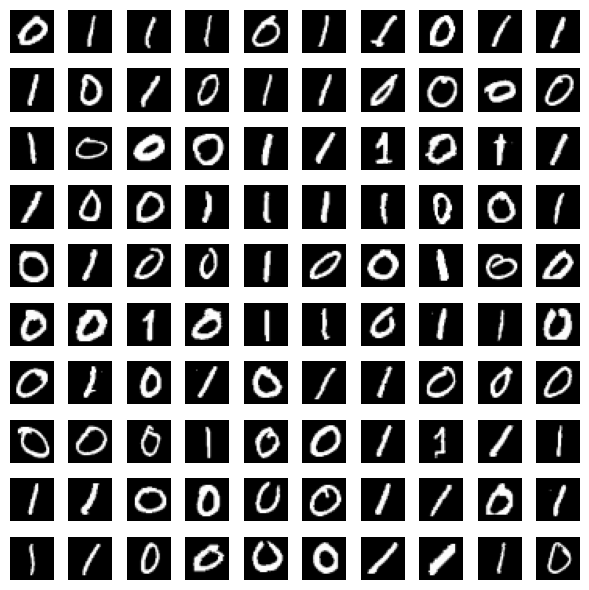

In [40]:
# Plot some examples
plot_random_examples(x_train, y_train)

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [45]:
# RESHAPE

x_train_flat = x_train.reshape(x_train.shape[0],-1)
print(x_train_flat.shape)
print('Train: '+str(x_train_flat.shape[0])+' images and '+str(x_train_flat.shape[1])+' neurons \n')

x_test_flat = x_test.reshape(x_test.shape[0],-1)
print(x_test_flat.shape)
print('Test: '+str(x_test_flat.shape[0])+' images and '+str(x_test_flat.shape[1])+' neurons \n')

# STRANDARIZE
x_train_flat = x_train_flat / 255
x_test_flat = x_test_flat / 255

(12665, 784)
Train: 12665 images and 784 neurons 

(2115, 784)
Test: 2115 images and 784 neurons 



# 3 - Entrenamiento del modelo

In [46]:
np.shape(x_test[0])

(28, 28)

In [47]:
"""### Train the model (in training set)"""

# Initialize parameters with zeros (≈ 1 line of code)
w, b = initialize_weights(x_train_flat.shape[1])

# Gradient descent (≈ 1 line of code)
learning_rate = 0.005
num_iterations = 2000
parameters, grads, costs = gradient_descent(w, b, x_train_flat, y_train, num_iterations, learning_rate)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.201280
Cost after iteration 200: 0.120349
Cost after iteration 300: 0.088112
Cost after iteration 400: 0.070691
Cost after iteration 500: 0.059708
Cost after iteration 600: 0.052112
Cost after iteration 700: 0.046521
Cost after iteration 800: 0.042221
Cost after iteration 900: 0.038801
Cost after iteration 1000: 0.036010
Cost after iteration 1100: 0.033685
Cost after iteration 1200: 0.031714
Cost after iteration 1300: 0.030021
Cost after iteration 1400: 0.028548
Cost after iteration 1500: 0.027255
Cost after iteration 1600: 0.026108
Cost after iteration 1700: 0.025083
Cost after iteration 1800: 0.024162
Cost after iteration 1900: 0.023329


# 4 - Validación del modelo


train accuracy: 99.73943939992104 %
test accuracy: 99.90543735224587 %

Accuracy for testing data:
 0.9990543735224586
Sensitivity for testing data:
 0.9979591836734694
Specificity for testing data:
 1.0
Balanced accuracy for testing data:
 0.9989795918367347


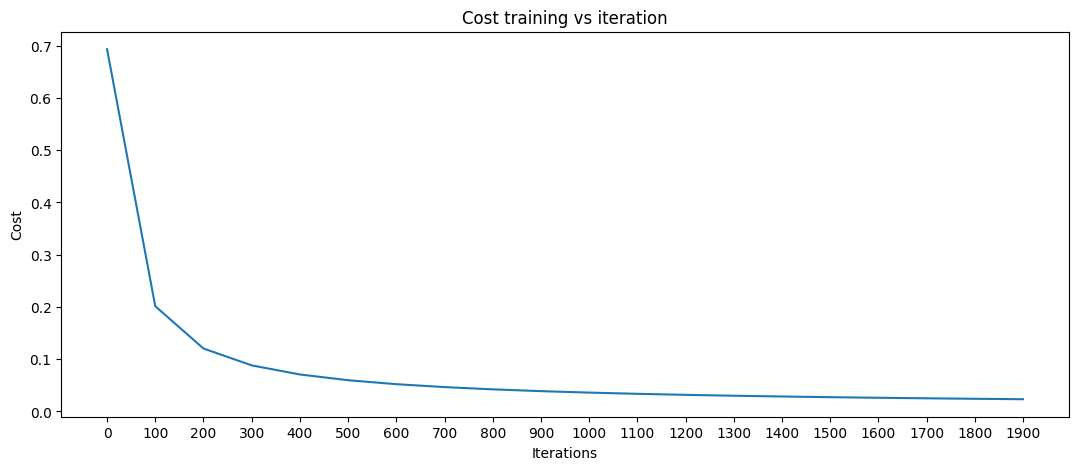

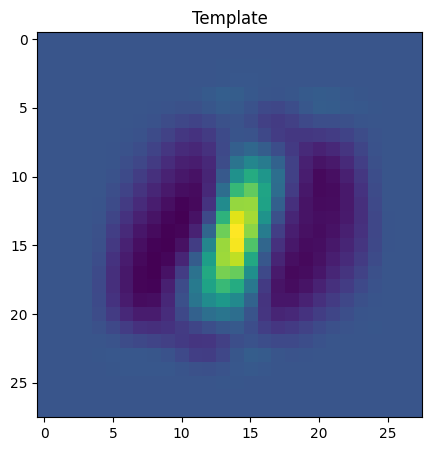

In [48]:
"""### Test the model (in testing set)"""

# Retrieve parameters w and b from dictionary "parameters"
w = parameters["w"]
b = parameters["b"]
    
# Predict test/train set examples (≈ 2 lines of code)
y_prediction_test = predict(w, b, x_test_flat)
y_prediction_train = predict(w, b, x_train_flat)

# Print train/test Errors
print('')
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
print('')

plt.figure(figsize=(13,5))
plt.plot(range(0,2000,100),costs)
plt.title('Cost training vs iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xticks(range(0,2000,100))


plt.figure(figsize=(13,5))
plt.imshow(w.reshape(28,28))
plt.title('Template')

TP=TP_calculator(y_test,np.squeeze(y_prediction_test))
TN=TN_calculator(y_test,np.squeeze(y_prediction_test))
FP=FP_calculator(y_test,np.squeeze(y_prediction_test))
FN=FN_calculator(y_test,np.squeeze(y_prediction_test))

AccTest=(TP+TN)/(TP+TN+FN+FP)
print("Accuracy for testing data:\n", AccTest)
SensTest=TP/(TP+FN)
print("Sensitivity for testing data:\n", SensTest)
SpecTest=TN/(TN+FP)
print("Specificity for testing data:\n", SpecTest)
BalancedAccTest=(SensTest + SpecTest)/2
print("Balanced accuracy for testing data:\n", BalancedAccTest)

# 5 - Carga de datos y preparación para el entrenamiento - Números 5 y 6

In [50]:
"""## Merge functions and run your model now for 5 and 6"""

# LOAD DATA
class0 = 5
class1 = 6

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[np.isin(y_train,[class0,class1]),:,:]
y_train = 1*(y_train[np.isin(y_train,[class0,class1])]>class0)
x_test = x_test[np.isin(y_test,[class0,class1]),:,:]
y_test = 1*(y_test[np.isin(y_test,[class0,class1])]>class0)

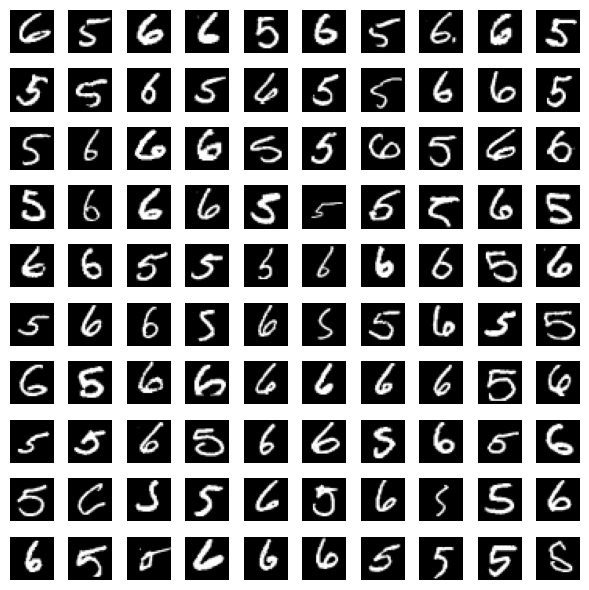

In [51]:
# Plot some examples
plot_random_examples(x_train, y_train)

In [52]:
# RESHAPE

x_train_flat = x_train.reshape(x_train.shape[0],-1)
print(x_train_flat.shape)
print('Train: '+str(x_train_flat.shape[0])+' images and '+str(x_train_flat.shape[1])+' neurons \n')

x_test_flat = x_test.reshape(x_test.shape[0],-1)
print(x_test_flat.shape)
print('Test: '+str(x_test_flat.shape[0])+' images and '+str(x_test_flat.shape[1])+' neurons \n')

# STRANDARIZE
x_train_flat = x_train_flat / 255
x_test_flat = x_test_flat / 255

(11339, 784)
Train: 11339 images and 784 neurons 

(1850, 784)
Test: 1850 images and 784 neurons 



# 6 - Entrenamiento del modelo

In [53]:
"""### Train the model (in training set)"""

# Initialize parameters with zeros (≈ 1 line of code)
w, b = initialize_weights(x_train_flat.shape[1])

# Gradient descent (≈ 1 line of code)
learning_rate = 0.005
num_iterations = 2000
parameters, grads, costs = gradient_descent(w, b, x_train_flat, y_train, 2000, 0.005)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.387598
Cost after iteration 200: 0.288959
Cost after iteration 300: 0.240598
Cost after iteration 400: 0.211459
Cost after iteration 500: 0.191734
Cost after iteration 600: 0.177359
Cost after iteration 700: 0.166341
Cost after iteration 800: 0.157582
Cost after iteration 900: 0.150420
Cost after iteration 1000: 0.144436
Cost after iteration 1100: 0.139346
Cost after iteration 1200: 0.134955
Cost after iteration 1300: 0.131120
Cost after iteration 1400: 0.127736
Cost after iteration 1500: 0.124723
Cost after iteration 1600: 0.122020
Cost after iteration 1700: 0.119578
Cost after iteration 1800: 0.117359
Cost after iteration 1900: 0.115333


# 7 - Validación del modelo


train accuracy: 96.772202134227 %
test accuracy: 97.24324324324324 %

Accuracy for testing data:
 0.9724324324324324
Sensitivity for testing data:
 0.9674887892376681
Specificity for testing data:
 0.9770354906054279
Balanced accuracy for testing data:
 0.9722621399215481


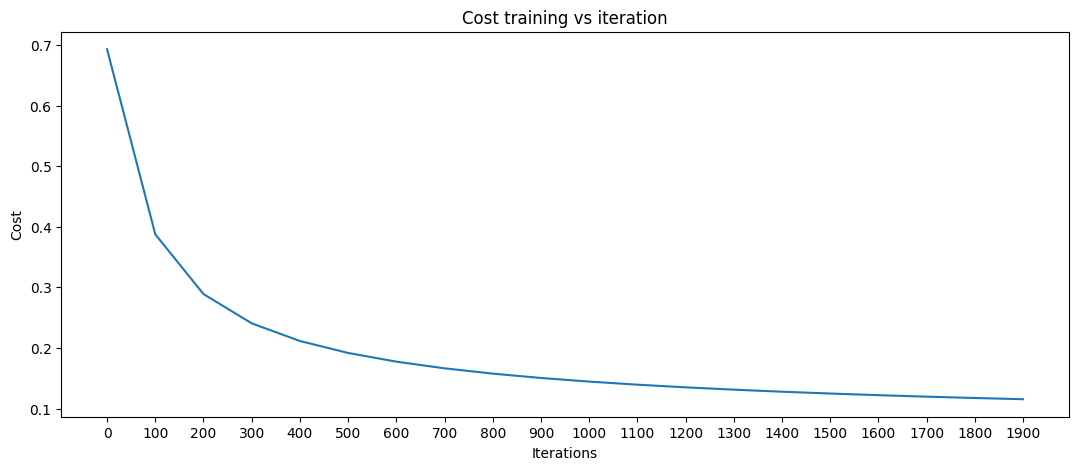

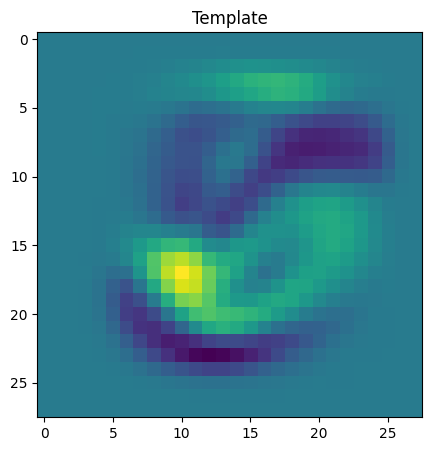

In [54]:
"""### Test the model (in testing set)"""

# Retrieve parameters w and b from dictionary "parameters"
w = parameters["w"]
b = parameters["b"]
    
# Predict test/train set examples (≈ 2 lines of code)
y_prediction_test = predict(w, b, x_test_flat)
y_prediction_train = predict(w, b, x_train_flat)

# Print train/test Errors
print('')
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
print('')

plt.figure(figsize=(13,5))
plt.plot(range(0,2000,100),costs)
plt.title('Cost training vs iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xticks(range(0,2000,100))


plt.figure(figsize=(13,5))
plt.imshow(w.reshape(28,28))
plt.title('Template')

TP=TP_calculator(y_test,np.squeeze(y_prediction_test))
TN=TN_calculator(y_test,np.squeeze(y_prediction_test))
FP=FP_calculator(y_test,np.squeeze(y_prediction_test))
FN=FN_calculator(y_test,np.squeeze(y_prediction_test))

AccTest=(TP+TN)/(TP+TN+FN+FP)
print("Accuracy for testing data:\n", AccTest)
SensTest=TP/(TP+FN)
print("Sensitivity for testing data:\n", SensTest)
SpecTest=TN/(TN+FP)
print("Specificity for testing data:\n", SpecTest)
BalancedAccTest=(SensTest + SpecTest)/2
print("Balanced accuracy for testing data:\n", BalancedAccTest)